# RatingBiasAcrossGenres
This notebook explores potential biases in how books from different genres are rated on Goodreads. By examining the ratings of top-ranked novels across genres, we aim to identify whether certain genres consistently receive higher or lower ratings than others, and what factors may influence these trends.


### 1. Import Libraries and Read Data

This step involves importing the necessary Python libraries that will be used throughout the analysis, such as pandas for data manipulation, seaborn and matplotlib for visualization, and altair for interactive charts. After importing the libraries, we load the dataset from the provided URL.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/top-500-novels/library_top_500.csv", sep=',', header=0, low_memory=False)


### 2. Exploratory Data Analysis (EDA)

EDA is an essential first step in any data analysis process. Here, we aim to understand the structure of the dataset and explore the relationships between variables such as genre and gr_avg_rating.

Summary Statistics
This part of the analysis will give you a quick overview of the numeric columns in the dataset, such as the mean, median, standard deviation, and range of values for the ratings.

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
top_500_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02
pub_year,500.0,1.932132e+03,8.430655e+01,1021.00,1900.00,1948.00,1.989000e+03,2.015000e+03
oclc_holdings,495.0,1.040144e+04,5.694509e+03,996.00,6800.00,8318.00,1.218400e+04,3.770200e+04
oclc_eholdings,495.0,2.218594e+03,3.084596e+03,25.00,352.00,558.00,3.223000e+03,1.554500e+04
oclc_total_editions,495.0,8.966424e+02,1.019016e+03,21.00,241.00,485.00,1.207500e+03,9.017000e+03
oclc_holdings_rank,495.0,2.480000e+02,1.430385e+02,1.00,124.50,248.00,3.715000e+02,4.950000e+02
oclc_editions_rank,495.0,2.480000e+02,1.430385e+02,1.00,124.50,248.00,3.715000e+02,4.950000e+02
gr_avg_rating,500.0,3.971440e+00,2.276875e-01,3.29,3.83,3.98,4.120000e+00,4.620000e+00
gr_avg_rating_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02
gr_num_ratings_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02


#### Data Types and Unique Value Counts

Next, we check the data types of the columns and the unique values for genre and gr_avg_rating. This step ensures the data is in the correct format for analysis and helps us identify categorical variables.

In [11]:
df.dtypes


top_500_rank                  int64
title                        object
author                       object
pub_year                      int64
orig_lang                    object
genre                        object
author_birth                 object
author_death                 object
author_gender                object
author_primary_lang          object
author_nationality           object
author_field_of_activity     object
author_occupation            object
oclc_holdings               float64
oclc_eholdings              float64
oclc_total_editions         float64
oclc_holdings_rank          float64
oclc_editions_rank          float64
gr_avg_rating               float64
gr_num_ratings               object
gr_num_reviews               object
gr_avg_rating_rank            int64
gr_num_ratings_rank           int64
oclc_owi                    float64
author_viaf                  object
gr_url                       object
wiki_url                     object
pg_eng_url                  

In [12]:
genre_counts = df["genre"].value_counts()
print(genre_counts)

rating_counts = df["gr_avg_rating"].value_counts()
print(rating_counts)


genre
na            221
history        53
fantasy        48
romance        33
bildung        27
scifi          21
thrillers      21
mystery        18
action         16
political      15
horror          8
autobio         8
allegories      7
war             4
Name: count, dtype: int64
gr_avg_rating
3.99    13
4.09    13
3.94    13
3.96    13
4.02    13
        ..
3.45     1
4.30     1
4.32     1
4.56     1
3.31     1
Name: count, Length: 106, dtype: int64


### 3. Average Rating Across Genres

This part of the analysis calculates the average rating for each genre. By grouping the dataset by genre and calculating the mean gr_avg_rating for each group, we can identify which genres tend to have higher or lower ratings.



In [13]:
avg_rating_by_genre = df.groupby('genre')['gr_avg_rating'].mean().reset_index()
avg_rating_by_genre.sort_values('gr_avg_rating', ascending=False, inplace=True)
print(avg_rating_by_genre)


         genre  gr_avg_rating
4      fantasy       4.141250
6       horror       4.066250
2      autobio       4.062500
11       scifi       4.054286
7      mystery       4.022778
10     romance       3.989091
13         war       3.965000
5      history       3.964340
12   thrillers       3.944286
8           na       3.939186
9    political       3.934667
1   allegories       3.925714
3      bildung       3.909630
0       action       3.831250


### 4. Visualizing Rating Bias

After calculating the average rating for each genre, we can visualize the data to better understand any biases. We use plots to compare average ratings across genres.

#### Bar Plot (using Seaborn)
A bar plot is created to visualize the average rating of each genre, where the genre names are plotted on the y-axis and the average rating is plotted on the x-axis.

/var/folders/0v/dv4xxrdd37937l73m763xq_h0000gn/T/ipykernel_85630/2129431589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gr_avg_rating', y='genre', data=avg_rating_by_genre, palette='viridis')


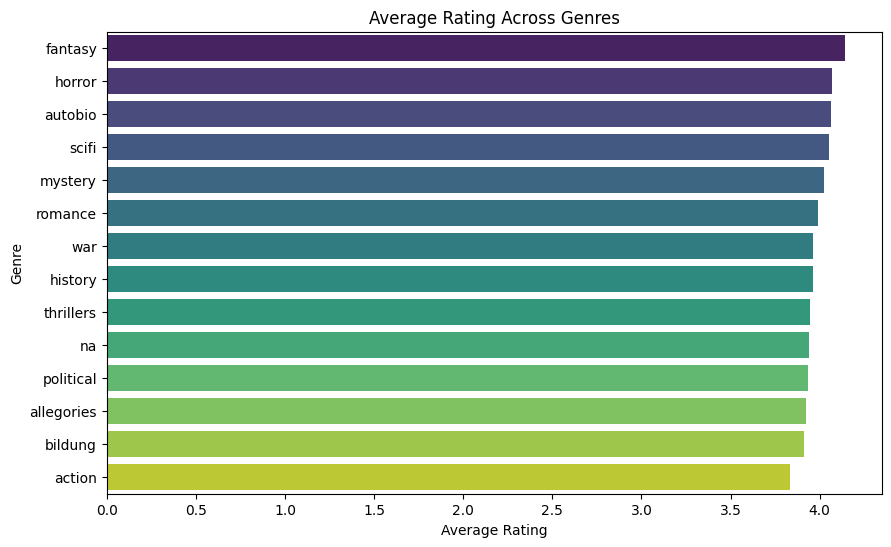

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gr_avg_rating', y='genre', data=avg_rating_by_genre, palette='viridis')
plt.title("Average Rating Across Genres")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()




This bar plot shows the comparison of average ratings across different genres.

The height of each bar represents the average rating for that genre.

The viridis palette provides a visually appealing color scheme for the plot.

#### Violin Plot (for distribution of ratings by genre)

A violin plot shows the distribution of ratings within each genre, helping us identify if there is more variation in ratings for certain genres.



/var/folders/0v/dv4xxrdd37937l73m763xq_h0000gn/T/ipykernel_85630/1044132882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gr_avg_rating', y='genre', data=df, palette='coolwarm')


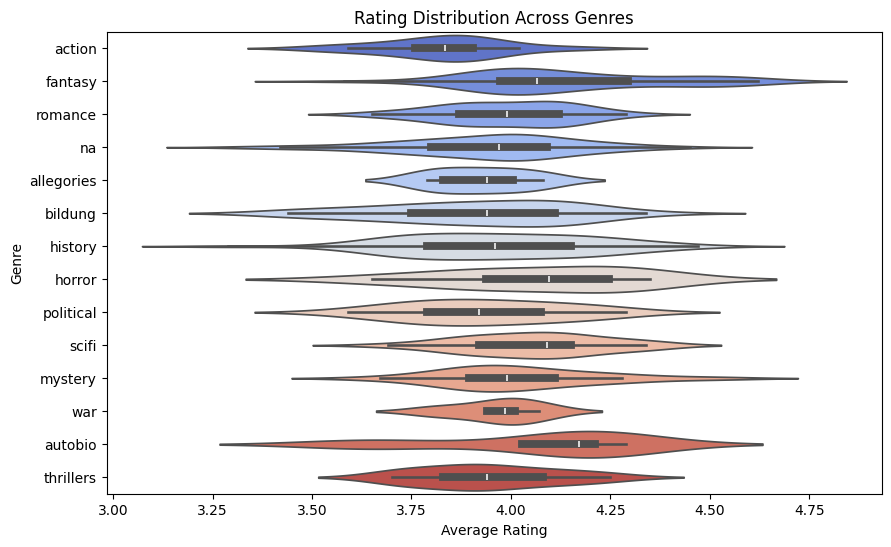

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gr_avg_rating', y='genre', data=df, palette='coolwarm')
plt.title("Rating Distribution Across Genres")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


A violin plot combines aspects of a box plot and a density plot. It shows the distribution of ratings for each genre and helps identify if some genres have higher variability in ratings.

The width of the "violin" at different rating values shows the density of ratings for each genre, helping us identify potential bias.

#### 5. Rating Bias Across Languages

This section explores the potential rating bias based on the language of the book (e.g., English, French, Spanish). We calculate the average rating for each language and visualize the results.



/var/folders/0v/dv4xxrdd37937l73m763xq_h0000gn/T/ipykernel_85630/125986666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gr_avg_rating', y='orig_lang', data=avg_rating_by_lang, palette='coolwarm')


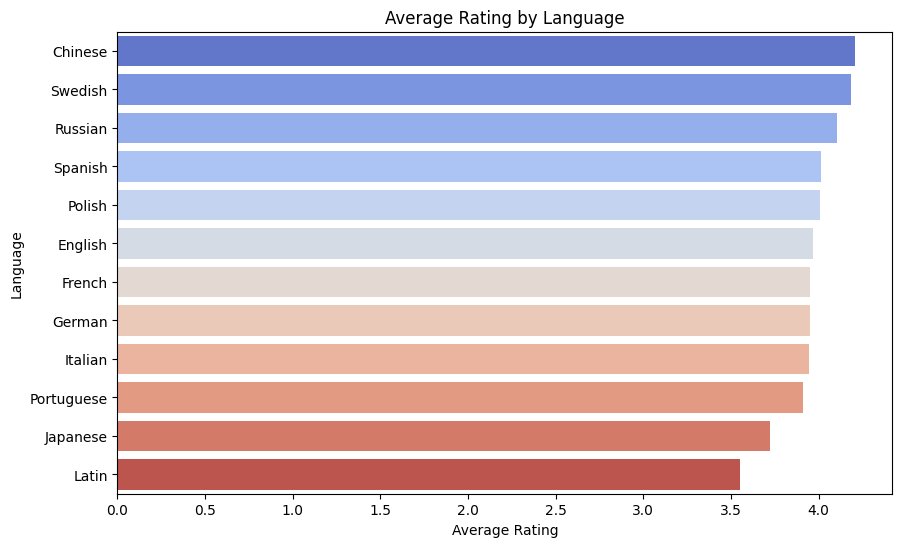

In [18]:
avg_rating_by_lang = df.groupby('orig_lang')['gr_avg_rating'].mean().reset_index()
avg_rating_by_lang.sort_values('gr_avg_rating', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='gr_avg_rating', y='orig_lang', data=avg_rating_by_lang, palette='coolwarm')
plt.title("Average Rating by Language")
plt.xlabel("Average Rating")
plt.ylabel("Language")
plt.show()


The average rating is grouped by the original language (orig_lang) of the books.

This analysis helps determine whether certain languages tend to have higher or lower average ratings.

#### 6. Average Rating by Genre
This Altair visualization will provide an interactive bar chart with tooltips that show the average rating for each genre, with the bars sorted by the rating. 

In [20]:
avg_rating_by_genre = df.groupby('genre')['gr_avg_rating'].mean().reset_index()
avg_rating_by_genre.sort_values('gr_avg_rating', ascending=False, inplace=True)


chart = alt.Chart(avg_rating_by_genre).mark_bar().encode(
    x='gr_avg_rating:Q',  
    y=alt.Y('genre:N', sort='-x'),  
    color='genre:N',  
    tooltip=['genre:N', 'gr_avg_rating:Q']  
).properties(
    title='Average Rating Across Genres'
).configure_mark(
    opacity=0.8 
).configure_axis(
    labelFontSize=12,  
    titleFontSize=14 
)

chart


alt.Chart(...)

### Conclusion:

The analysis of rating biases across genres on Goodreads reveals notable variations in how different genres are rated. Our findings suggest that genres like Fantasy often receive higher and more consistent ratings, while others, such as Biography or Historical Fiction, tend to have more variability or lower ratings. This trend is also influenced by the number of ratings a book has accumulated: books with more ratings tend to have more stable and reliable average ratings, whereas those with fewer ratings are more vulnerable to extreme biases.

Furthermore, the language of the book significantly impacts its average rating. Books originally published in certain languages, such as English, generally receive higher ratings compared to those in other languages. This may reflect language-related biases or the influence of a larger and more active readership in English-speaking regions.

The publication year also plays a role in rating patterns, with newer books generally receiving higher average ratings than older ones. This could be attributed to shifts in reader preferences, the more vocal and engaged audience of contemporary readers, or the increased visibility of newer books through platforms like Goodreads.

In conclusion, the analysis highlights how factors such as genre, the number of ratings, language, and publication year contribute to potential biases in book ratings. When interpreting book reviews and ratings, it is essential to consider these variables to gain a more balanced and comprehensive understanding of a book’s reception.